<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
    Importing Libraries and Data
</div>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving DailyDelhiClimateTest.csv to DailyDelhiClimateTest.csv
Saving DailyDelhiClimateTrain.csv to DailyDelhiClimateTrain.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.subplots as sp

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [4]:
train=pd.read_csv(r'DailyDelhiClimateTrain.csv')
test=pd.read_csv(r'DailyDelhiClimateTest.csv')


In [5]:
train.shape

(1462, 5)

In [6]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [8]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
    Data preprocessing

</div>


In [9]:
# Convert the 'date' column to datetime format
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')

# Extract the year, month, and day from the 'date' column
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

# Set the 'date' column as the index
train.set_index(train['date'], inplace=True)


# Drop the original 'date' column
df = train.drop(columns=['date'])

df.head()


,meantemp,humidity,wind_speed,meanpressure,year,month,day
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int32  
 5   month         1462 non-null   int32  
 6   day           1462 non-null   int32  
dtypes: float64(4), int32(3)
memory usage: 74.2 KB


In [11]:
df.isnull().sum()

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0
year,0
month,0
day,0


In [12]:
df.duplicated().any()

np.False_

<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   Exploratory Data Analysis

</div>


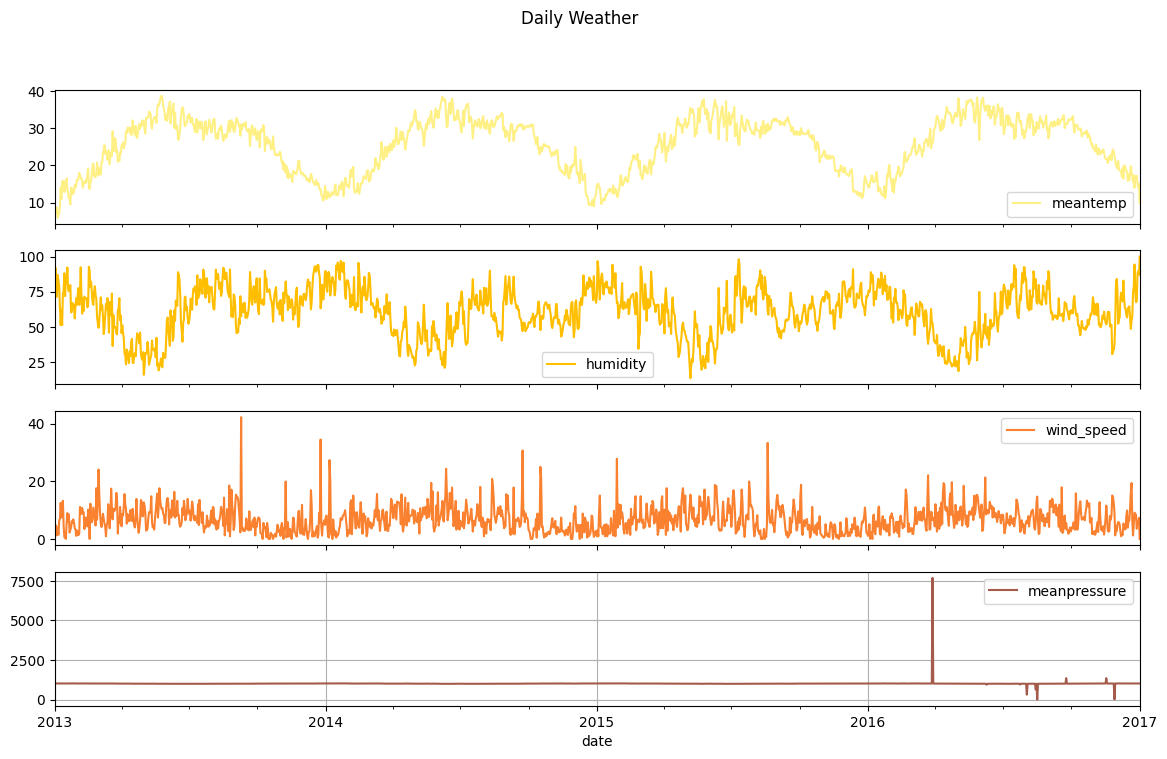

In [13]:
df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].plot(
    figsize=(14, 8),
    subplots=True,
    title="Daily Weather",
    color= ['#FFF085', '#FFBF00' , '#FA812F', '#A55B4B']
)
plt.grid(True)
plt.show()


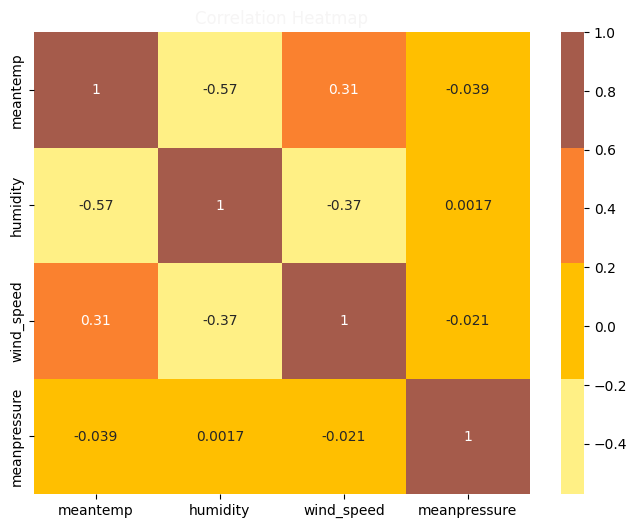

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define custom colormap
custom_cmap = ListedColormap( ['#FFF085', '#FFBF00' , '#FA812F', '#A55B4B'])   # ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']

plt.figure(figsize=(8,6))
sns.heatmap(
    df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr(),
    annot=True,
    cmap=custom_cmap
)
plt.title('Correlation Heatmap', color='#F6F5F5')
plt.show()


In [15]:
fig = go.Figure()

# meantemp
fig.add_trace(go.Scatter(x=df.index, y=df['meantemp'],
                         mode='lines', name='Mean Temp',
                         line=dict(color='#FFF085')))

# humidity
fig.add_trace(go.Scatter(x=df.index, y=df['humidity'],
                         mode='lines', name='Humidity',
                         line=dict(color='#FA812F')))                # ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']


# wind_speed
fig.add_trace(go.Scatter(x=df.index, y=df['wind_speed'],
                         mode='lines', name='Wind Speed',
                         line=dict(color='#A55B4B')))

# meanpressure
fig.add_trace(go.Scatter(x=df.index, y=df['meanpressure'],
                         mode='lines', name='Mean Pressure',
                         line=dict(color='#FFBF00')))

fig.update_layout(title='Time Series Plots',
                  xaxis_title='Date',
                  yaxis_title='Value',
                  plot_bgcolor='#FBF6E9')

fig.show()


<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   detect outliers

</div>



In [16]:
# create box  plot for each column
fig = go.Figure()

# specify the columns to plot
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
colors = ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']

for col, color in zip(columns, colors):
    fig.add_trace(go.Box(y=df[col], name=col, marker_color=color))

fig.update_layout(
    title="Boxplot for Weather Data",
    yaxis_title="Value",
    boxmode="group",
    plot_bgcolor='#FBF6E9'
)


#  Display the interactive plot
fig.show()


In [17]:
# Define outliers for each column
# For wind speed
W_Q1 = df['wind_speed'].quantile(0.25)
W_Q3 = df['wind_speed'].quantile(0.75)
W_IQR = W_Q3 - W_Q1


wind_outliers= df[df['wind_speed'] > (W_Q3 + 1.5 * W_IQR)]

out_values=(W_Q3 + 1.5 * W_IQR)
print("Outlier values for wind speed > ", out_values)

#For mean pressure
M_Q1 = df['meanpressure'].quantile(0.25)
M_Q3 = df['meanpressure'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

pressure_outliers = df[(df['meanpressure'] > (M_Q3 + 1.5 * M_IQR))| (df['meanpressure'] < (M_Q1 - 1.5 * M_IQR))]
out_values2=(M_Q3 + 1.5 * M_IQR)
out_values3=(M_Q1 - 1.5 * M_IQR)
print("Outlier values for mean pressure < ", out_values3 , "And" " > ", out_values2)

#For humidity
H_Q1 = df['humidity'].quantile(0.25)
H_Q3 = df['humidity'].quantile(0.75)
H_IQR = H_Q3 - H_Q1

humidity_outliers = df[(df['humidity'] < (H_Q1 - 1.5 * H_IQR))]
out_values4=(H_Q1 - 1.5 * H_IQR)
print("Outlier values for humidity < ", out_values4)

print("_____________________________________________________________")

print("Number of outliers in wind speed: ", wind_outliers.shape[0])
print("Number of outliers in mean pressure: ", pressure_outliers.shape[0])
print("Number of outliers in humidity: ", humidity_outliers.shape[0])


Outlier values for wind speed >  17.883088235294117
Outlier values for mean pressure <  981.5335408834585 And >  1034.991717575188
Outlier values for humidity <  17.609375
_____________________________________________________________
Number of outliers in wind speed:  30
Number of outliers in mean pressure:  9
Number of outliers in humidity:  2



<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   Remove outliers
</div>



In [18]:
df.drop(pressure_outliers.index, inplace=True)
df.drop(humidity_outliers.index, inplace=True)

median_wind = df['wind_speed'].median()
df.loc[df['wind_speed'] > (W_Q3 + 1.5 * W_IQR), 'wind_speed'] = median_wind


In [19]:
# create box  plot for each column
fig = go.Figure()

# specify the columns to plot
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
colors = ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']

for col, color in zip(columns, colors):
    fig.add_trace(go.Box(y=df[col], name=col, marker_color=color))

fig.update_layout(
    title="Boxplot for Weather Data ِAfter Outlier Removal",
    yaxis_title="Value",
    boxmode="group",
    plot_bgcolor='#FFFDF6'
)


#  Display the interactive plot
fig.show()


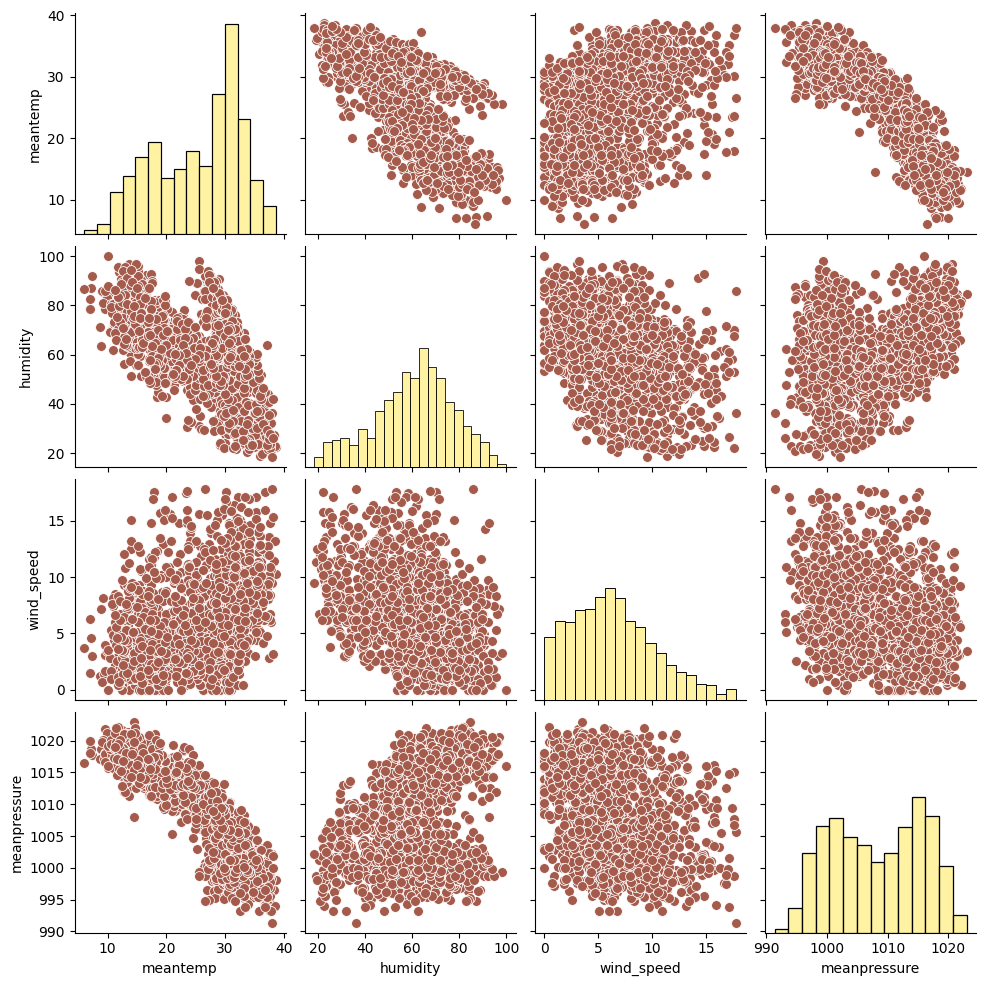

In [20]:

custom_palette = ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']
# Pairplot
sns.pairplot(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']],
             plot_kws={'color': custom_palette[2], 's': 50},
             diag_kws={'color': custom_palette[0], 'fill': True})


plt.show()


<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 30px;">
   (ACF)&(PACF)
</div>


### ➤ Mean_Temperature

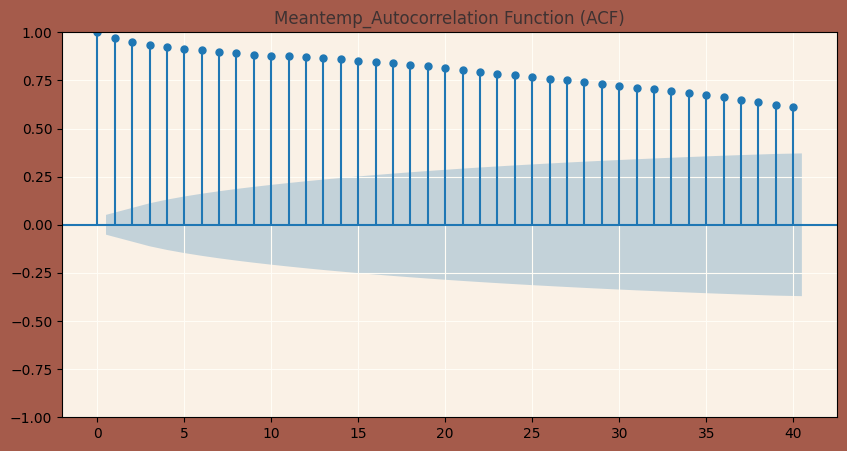

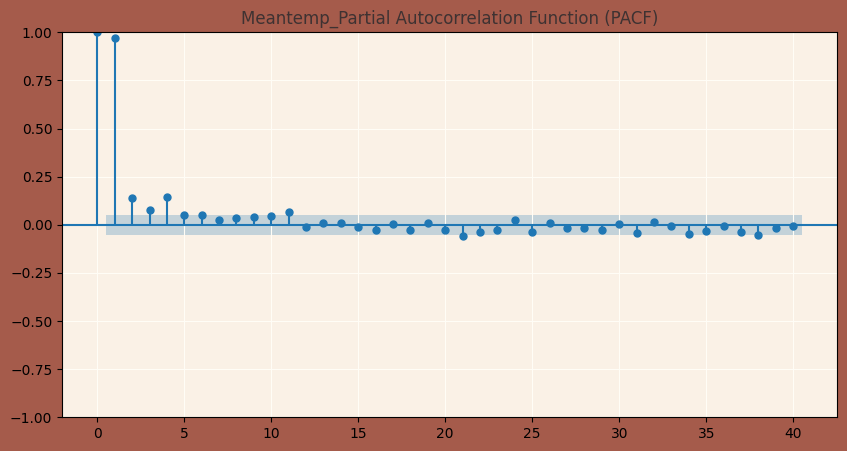

In [21]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
x=plot_acf(df['meantemp'], lags=40, ax=ax)



ax.set_title('Meantemp_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['meantemp'], lags=40, ax=ax, method='ywm')
ax.set_title('Meantemp_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

### ➤ Humiditiy

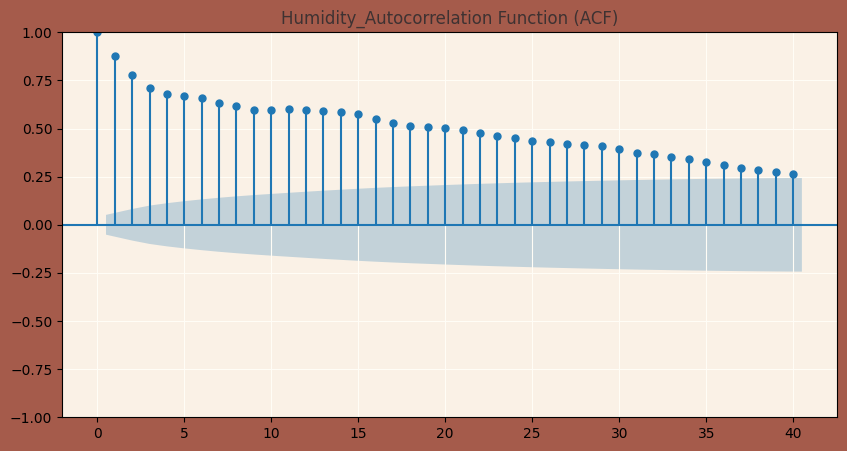

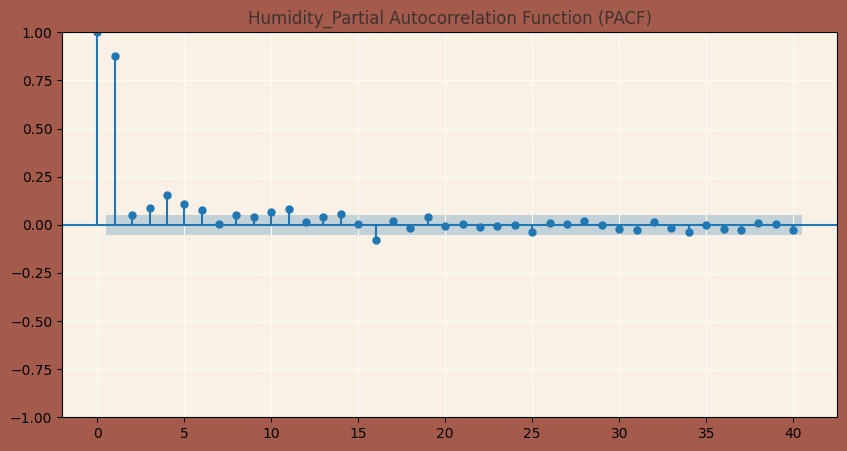

In [22]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['humidity'], lags=40, ax=ax)
ax.set_title('Humidity_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['humidity'], lags=40, ax=ax, method='ywm')
ax.set_title('Humidity_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

### ➤ Wind_Speed

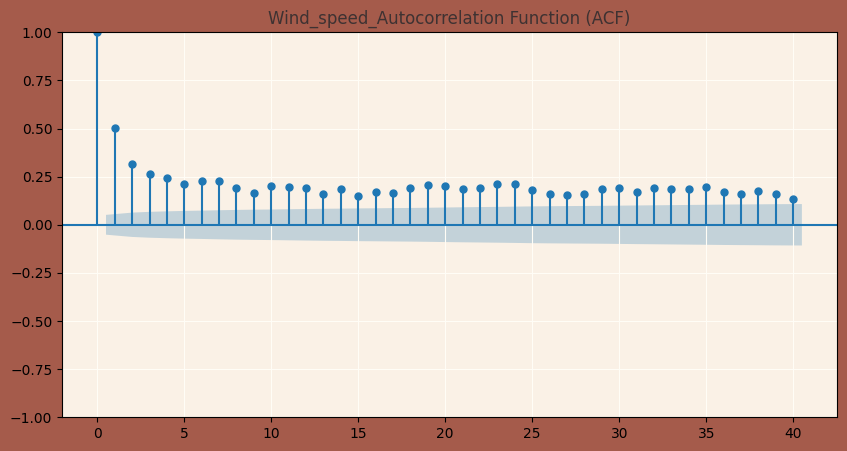

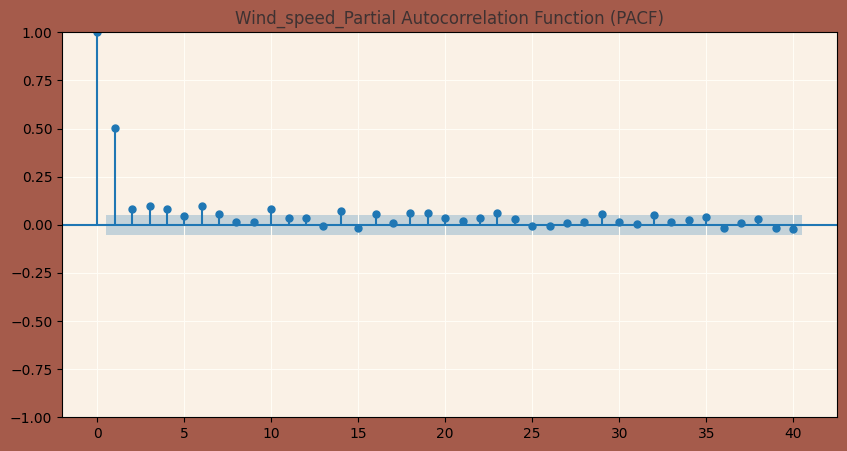

In [23]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['wind_speed'], lags=40, ax=ax)
ax.set_title('Wind_speed_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['wind_speed'], lags=40, ax=ax, method='ywm')
ax.set_title('Wind_speed_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

### ➤ Mean_pressure

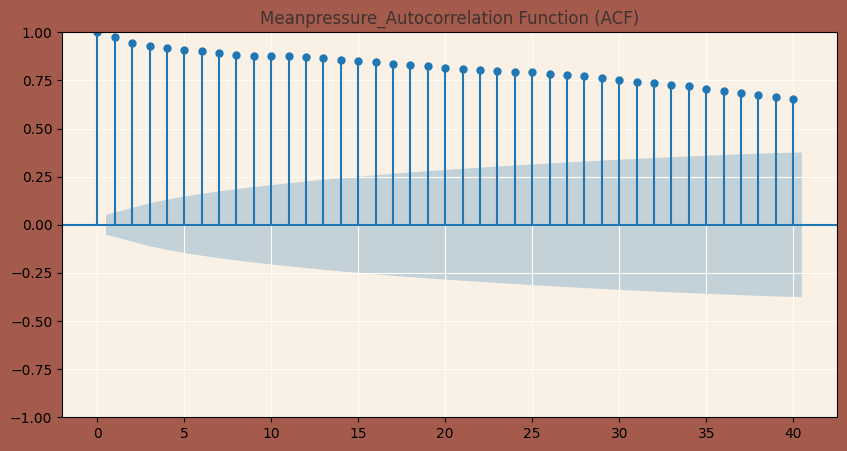

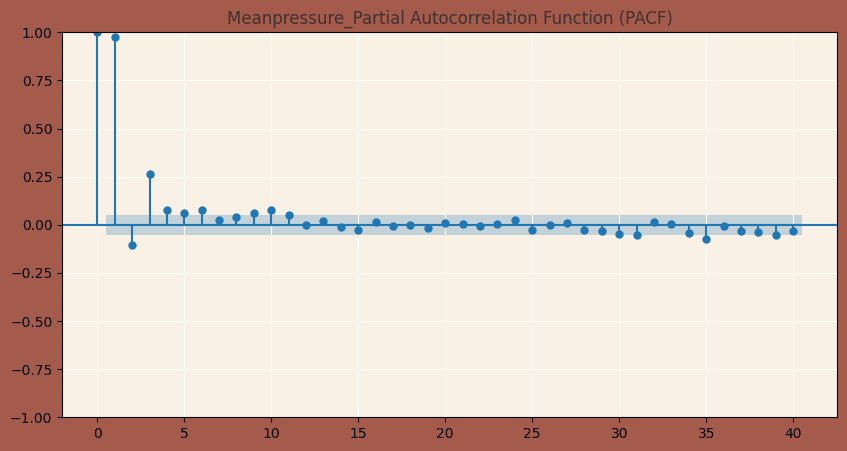

In [24]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['meanpressure'], lags=40, ax=ax)
ax.set_title('Meanpressure_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['meanpressure'], lags=40, ax=ax, method='ywm')
ax.set_title('Meanpressure_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()


<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 15px; text-align: center; font-size: 25px;">
   Stationary Test
</div>


### ➤ Mean_Temperature

In [25]:
# ADFULLER TEST
result = adfuller(df['meantemp'])
print(result[1])  # p-value
print("Stationary ?" , result[1] < 0.05)  # p-value < 0.05 indicates stationarity


0.2783180980810639
Stationary ? False


In [26]:
result = adfuller(df['meantemp'].diff().dropna())
print(result[1])  # p-value
print("Stationary ?" , result[1] < 0.05)  # p-value < 0.05 indicates stationarity
df['meantemp']=df['meantemp'].diff().dropna()

4.073259371083783e-29
Stationary ? True


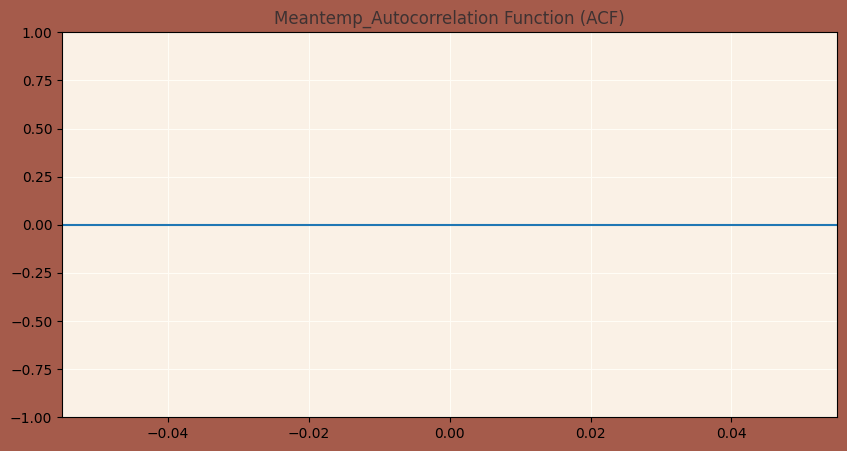

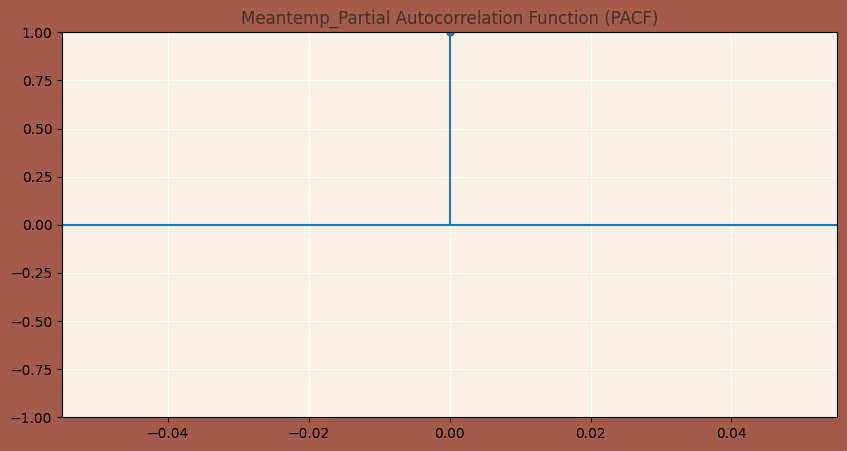

In [27]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['meantemp'], lags=40, ax=ax)
ax.set_title('Meantemp_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['meantemp'], lags=40, ax=ax, method='ywm')
ax.set_title('Meantemp_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

### ➤ Humidity

In [28]:
# ADFULLER TEST
result = adfuller(df['humidity'])
print(result[1])  # p-value
print("Stationary ?" , result[1] < 0.05)  # p-value < 0.05 indicates stationarity


0.0037651323240412236
Stationary ? True


### ➤ Wind_Speed

In [29]:
result = adfuller(df['wind_speed'])
print(result[1])  # p-value
print("Stationary ?" , result[1] < 0.05)  # p-value < 0.05 indicates stationarity

0.001330461041972931
Stationary ? True


### ➤ Mean_pressure

In [30]:
result = adfuller(df['meanpressure'])
print(result[1])  # p-value
print("Stationary ?" , result[1] < 0.05)  # p-value < 0.05 indicates stationarity

0.23248766663794618
Stationary ? False


In [31]:
result = adfuller(df['meanpressure'].diff().dropna())
print(result[1])  # p-value
print("Stationary ?" , result[1] < 0.05)  # p-value < 0.05 indicates stationarity
df['meanpressure']=df['meanpressure'].diff().dropna()

1.3773863408186574e-29
Stationary ? True


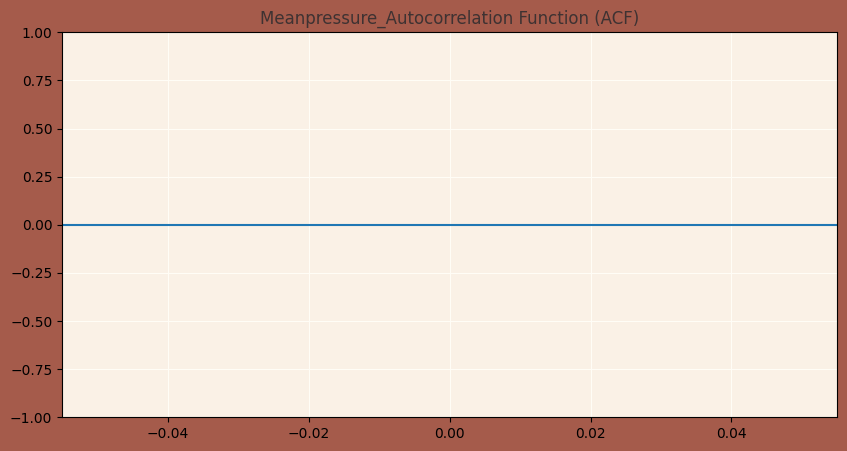

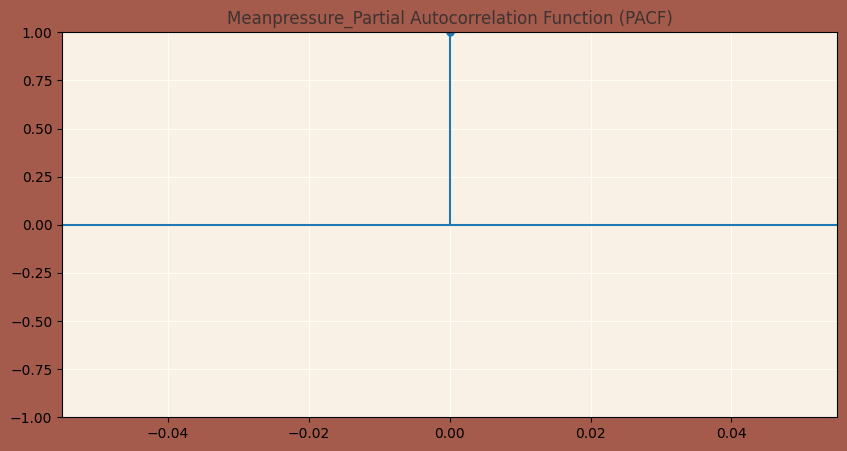

In [32]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['meanpressure'], lags=40, ax=ax)
ax.set_title('Meanpressure_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['meanpressure'], lags=40, ax=ax, method='ywm')
ax.set_title('Meanpressure_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   seasonality
</div>


In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def seasonal_decomposition_custom(df, column, model='multiplicative', figsize=(15, 8)):
    result = seasonal_decompose(df[column], model=model, period=30)

    fig = plt.figure(figsize=figsize)

    # Original
    ax1 = plt.subplot(411)                                                                  #['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']
    ax1.plot(df.index, result.observed, color='#FFF085')
    ax1.set_title('Original', color='#FFF085')
    #ax1.grid(True, color='#bab87b')
    #ax1.set_facecolor('#FAF1E6')

    # Trend
    ax2 = plt.subplot(412)
    ax2.plot(df.index, result.trend, color='#FA812F')
    ax2.set_title('Trend', color='#FA812F')
    ax2.grid(True, color='#bab87b')
    ax2.set_facecolor('#FAF1E6')

    # Seasonal
    ax3 = plt.subplot(413)
    ax3.plot(df.index, result.seasonal, color='#A55B4B')
    ax3.set_title('Seasonal', color='#A55B4B')
    ax3.grid(True, color='#bab87b')
    ax3.set_facecolor('#FAF1E6')

    # Residual
    ax4 = plt.subplot(414)
    ax4.plot(df.index, result.resid, color='#FFBF00')
    ax4.set_title('Residual', color='#FFBF00')
    ax4.grid(True, color='#bab87b')
    ax4.set_facecolor('#FAF1E6')

    plt.tight_layout()
    plt.show()



In [34]:
seasonal_decomposition_custom(df, 'meantemp', model='additive', figsize=(15, 8))

ValueError: This function does not handle missing values

In [ ]:
seasonal_decomposition_custom(df, 'humidity', model='additive', figsize=(15, 8))

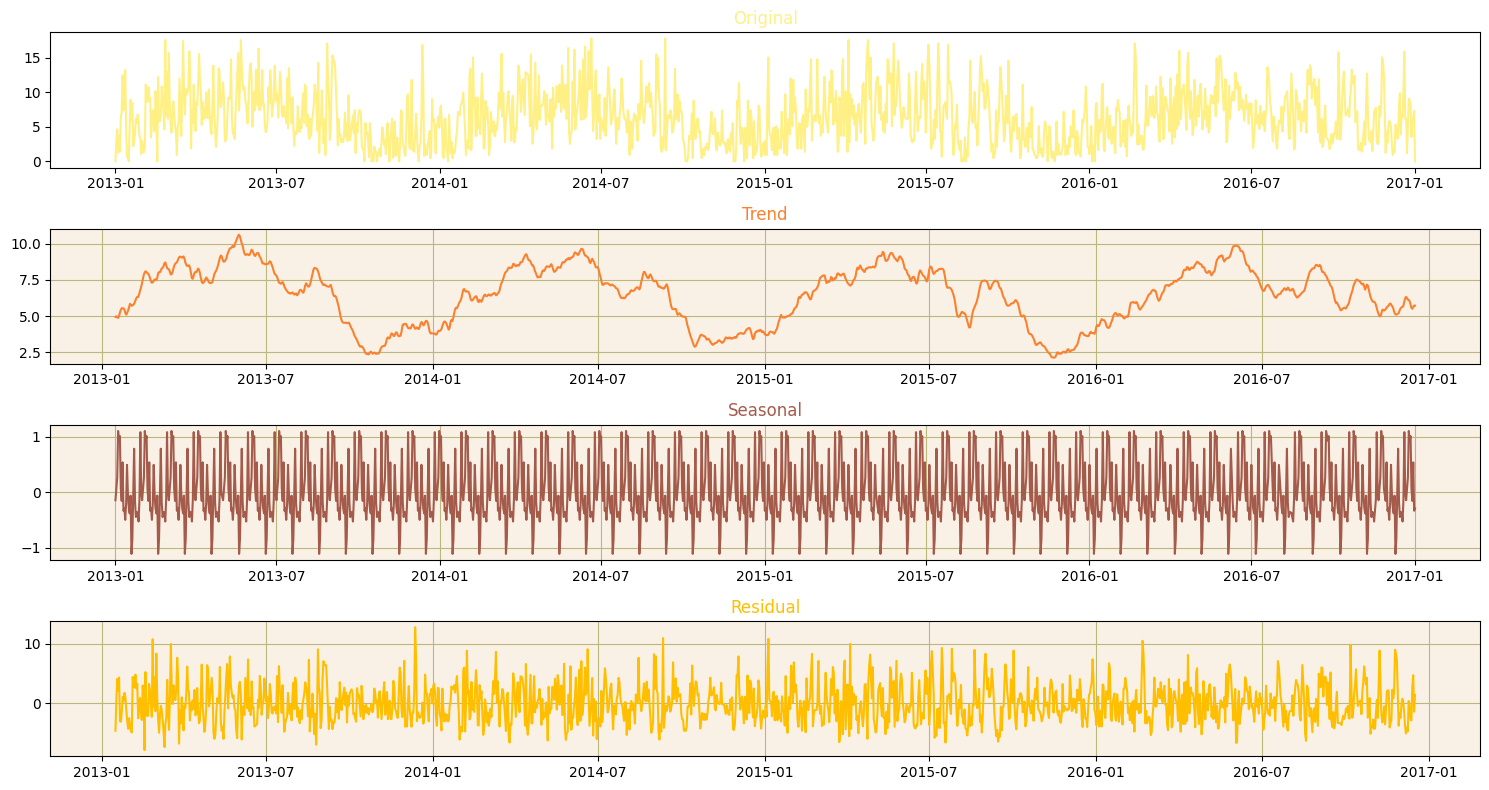

In [35]:
seasonal_decomposition_custom(df, 'wind_speed', model='additive', figsize=(15, 8))

In [36]:
seasonal_decomposition_custom(df, 'meanpressure', model='additive', figsize=(15, 8))

ValueError: This function does not handle missing values


<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   Trends
</div>



In [ ]:
"""
Visualizes multiple time series variables with their 30-day moving averages using Plotly subplots.

For each variable:
- Plots the original time series line.
- Overlays its 30-day moving average as a dashed line.

Purpose:
- To explore long-term trends versus daily fluctuations.
- Identify outliers and anomalies.
- Highlight smoothing effects of moving averages.

"""



df['meantemp_MA'] = df['meantemp'].rolling(window=30).mean()
df['humidity_MA'] = df['humidity'].rolling(window=30).mean()
df['wind_speed_MA'] = df['wind_speed'].rolling(window=30).mean()
df['meanpressure_MA'] = df['meanpressure'].rolling(window=30).mean()


fig = sp.make_subplots(rows=4, cols=1,
                       subplot_titles=('Mean Temp', 'Humidity', 'Wind Speed', 'Mean Pressure'),
                       shared_xaxes=True)

# Mean Temp
fig.add_trace(go.Scatter(x=df.index, y=df['meantemp'],
                         mode='lines', name='Mean Temp',
                         line=dict(color='#A55B4B')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['meantemp_MA'],
                         mode='lines', name='Mean Temp MA',
                         line=dict(color='#FFF085', dash='dash')),
              row=1, col=1)

# Humidity
fig.add_trace(go.Scatter(x=df.index, y=df['humidity'],
                         mode='lines', name='Humidity',
                         line=dict(color='#FFF085')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['humidity_MA'],
                         mode='lines', name='Humidity MA',
                         line=dict(color='#A55B4B', dash='dash')),
              row=2, col=1)

# Wind Speed
fig.add_trace(go.Scatter(x=df.index, y=df['wind_speed'],
                         mode='lines', name='Wind Speed',
                         line=dict(color='#FA812F')),
              row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['wind_speed_MA'],
                         mode='lines', name='Wind Speed MA',
                         line=dict(color='#A55B4B', dash='dash')),
              row=3, col=1)

# Mean Pressure
fig.add_trace(go.Scatter(x=df.index, y=df['meanpressure'],
                         mode='lines', name='Mean Pressure',
                         line=dict(color='#FFBF00')),
              row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['meanpressure_MA'],
                         mode='lines', name='Mean Pressure MA',
                         line=dict(color='#FA812F', dash='dash')),
              row=4, col=1)

# Layout
fig.update_layout(height=1200, width=900,
                  title_text='Time Series with 30-Day Moving Average ',
                  plot_bgcolor='#f6ece1')

fig.show()


**Model**

In [37]:
df.isna().sum()


,0
meantemp,1
humidity,0
wind_speed,0
meanpressure,1
year,0
month,0
day,0


In [38]:
df.dropna(subset=['meantemp', 'meanpressure'], inplace=True)


In [39]:
df.isna().sum()

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0
year,0
month,0
day,0


In [40]:
r=adfuller(df['meantemp'])
print(r[1])

4.073259371083783e-29


In [41]:
p=adfuller(df['meanpressure'])
print(p[1])

1.3773863408186574e-29


In [42]:
x=adfuller(df['humidity'])
print(x[1])

0.00392574620826787


In [43]:
n=adfuller(df['wind_speed'])
print(n[1])

0.0014117405012182456


In [44]:
# If no seasonality → Use ARIMA
# If seasonality is present → Use SARIMA
# If external factors matter → Use SARIMAX
# If you want automatic trend handling → Use Prophet
# If dataset is huge & complex → Use LSTMs or ML models

In [45]:
# AR (AutoRegressive) term – Uses past values (lags) to predict future values.
# MA (Moving Average) term – Uses past errors (residuals) to predict future values.
# ACF (Autocorrelation Function) – Measures correlation between a time series and its past values.
# PACF (Partial Autocorrelation Function) – Measures direct correlation after removing intermediate dependencies.

In [46]:
train = df.iloc[:-365]
test = df.iloc[-365:]

**Prophet Model**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/xv2yqlu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/k4clnce5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59911', 'data', 'file=/tmp/tmp7y27vc96/xv2yqlu6.json', 'init=/tmp/tmp7y27vc96/k4clnce5.json', 'output', 'file=/tmp/tmp7y27vc96/prophet_model5efqa4rc/prophet_model-20250516110935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


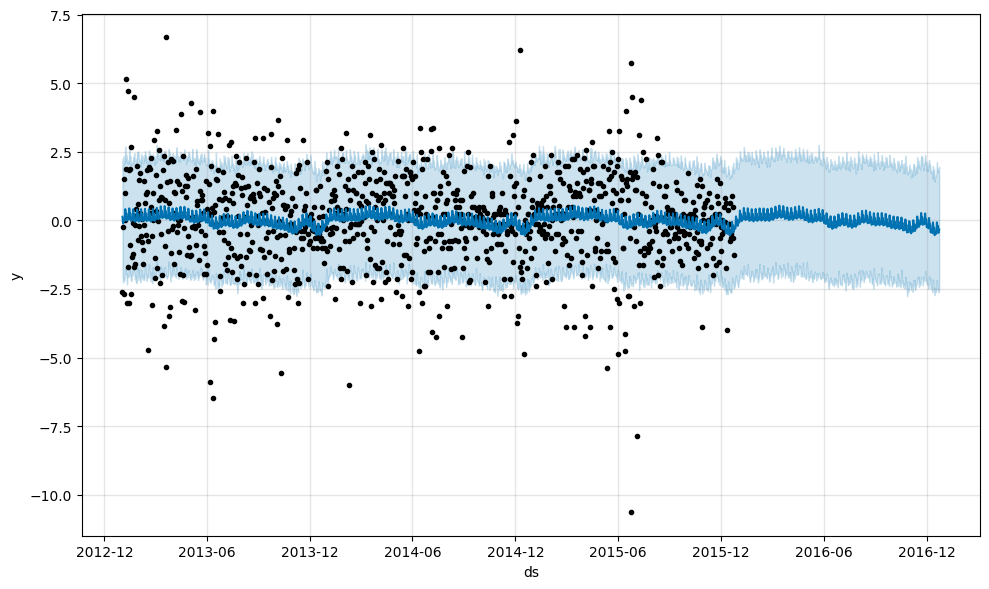

In [47]:
from prophet import Prophet

train_reset = train.reset_index()
prophet_df = train_reset[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})


model = Prophet()
model.fit(prophet_df)

# --- Create future DataFrame with 365 days ahead ---
future = model.make_future_dataframe(periods=365)


forecast = model.predict(future)


fig = model.plot(forecast)
plt.show()


**Wind_speed**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/dfboupf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/tidi43nu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53337', 'data', 'file=/tmp/tmp7y27vc96/dfboupf6.json', 'init=/tmp/tmp7y27vc96/tidi43nu.json', 'output', 'file=/tmp/tmp7y27vc96/prophet_modelut2wm8k5/prophet_model-20250516114744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:47:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:47:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


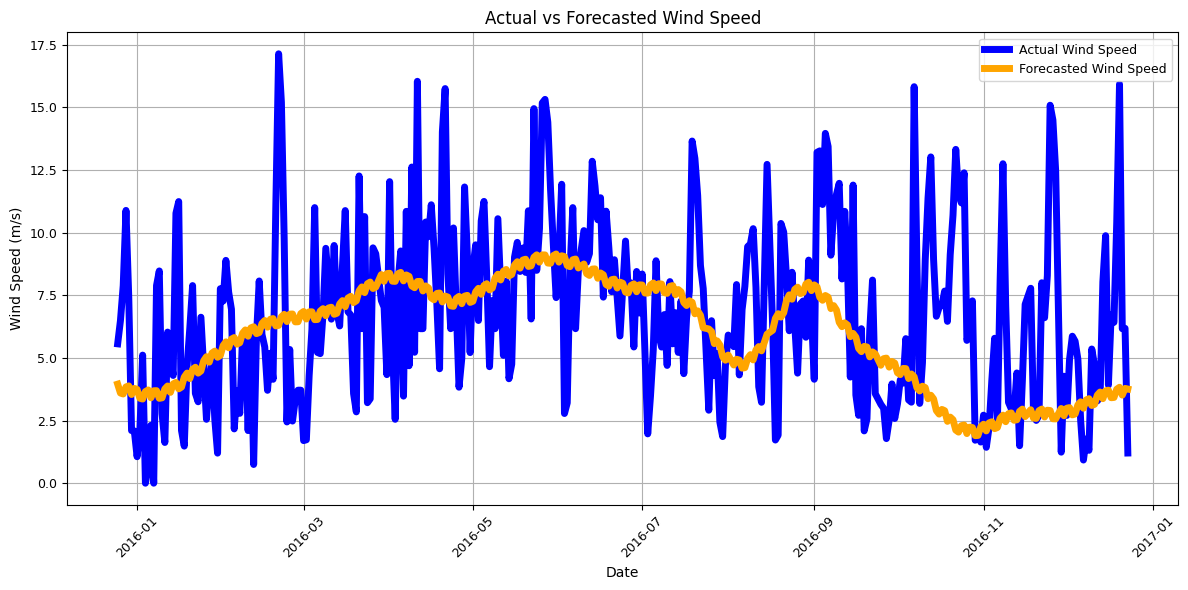

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# --- Prepare DataFrame for Prophet ---
train_reset = train.reset_index()  # convert index to column 'date'
prophet_df = train_reset[['date', 'wind_speed']].rename(columns={'date': 'ds', 'wind_speed': 'y'})

# --- Fit Prophet Model ---
model = Prophet()
model.fit(prophet_df)

# --- Create future DataFrame with 365 days ahead ---
future = model.make_future_dataframe(periods=365)

# --- Forecast ---
forecast = model.predict(future)

# --- Select forecast rows corresponding to test period (last 365 days + 1 extra) ---
test_forecast = forecast.iloc[-366:].copy()

# --- Convert 'ds' and test 'date' to datetime ---
test_forecast['ds'] = pd.to_datetime(test_forecast['ds'])
test_reset = test.reset_index()  # reset index to get 'date' column
test_reset['date'] = pd.to_datetime(test_reset['date'])

# --- Rename actual wind_speed column for clarity ---
real_test = test_reset.rename(columns={'wind_speed': 'actual_wind_speed'})

# --- Merge actual test data and forecast on date ---
merged_df = pd.merge(test_forecast[['ds', 'yhat']], real_test[['date', 'actual_wind_speed']],
                     left_on='ds', right_on='date', how='inner')

# --- Plot Actual vs Forecasted Wind Speed ---
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['actual_wind_speed'], label='Actual Wind Speed', color='blue', linewidth=5)
plt.plot(merged_df['ds'], merged_df['yhat'], label='Forecasted Wind Speed', color='orange', linewidth=5)

plt.xlabel('Date', fontsize=10)           # smaller font
plt.ylabel('Wind Speed (m/s)', fontsize=10)
plt.title('Actual vs Forecasted Wind Speed', fontsize=12)
plt.legend(fontsize=9)
plt.grid(True)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


Wind_speed Evaluation **

In [ ]:
def generate_forecast(_model, n_day ,steps):
    # Generate forecast using the input model
    future = _model.make_future_dataframe(periods=n_day+steps)
    forecast = _model.predict(future)

    # Create date frame
    forecast_df = forecast[['ds', 'yhat']].copy()
    forecast_df.set_index('ds', inplace=True)
    return forecast_df.iloc[n_day : n_day + steps]


Evaluation Metrics:
MAE:  2.774
RMSE: 3.652
R²:   -0.062


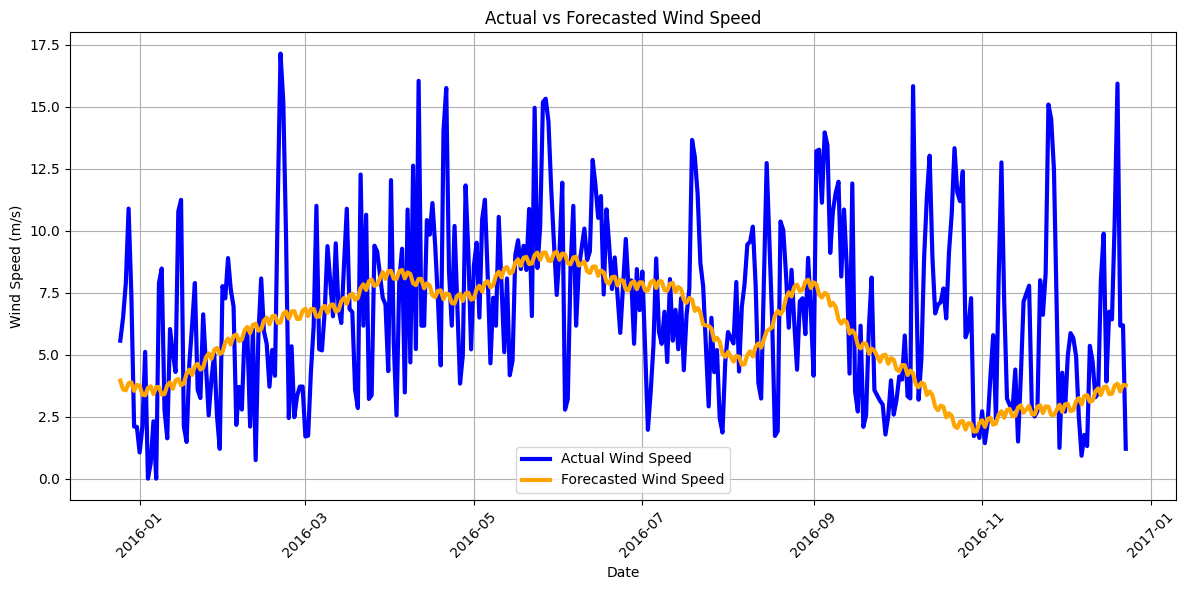

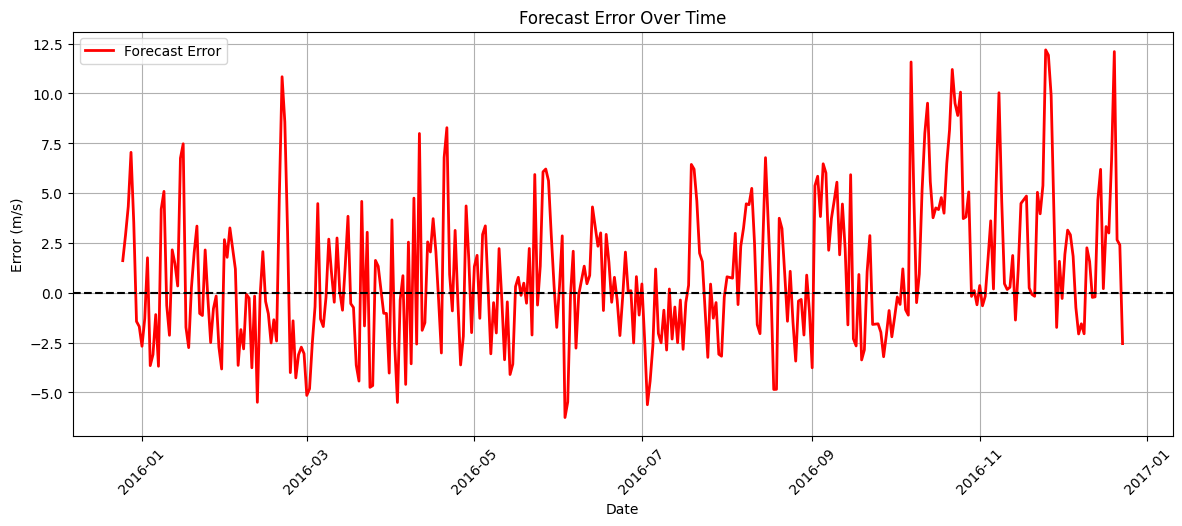

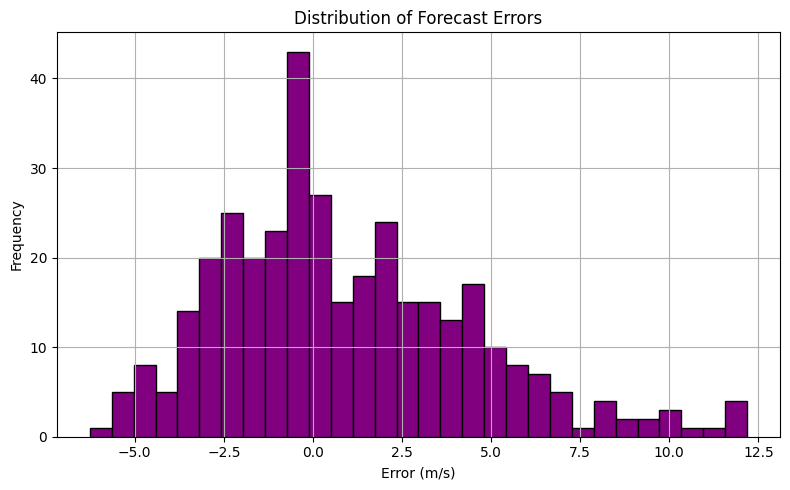

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- Evaluation Metrics ---
y_true = merged_df['actual_wind_speed']
y_pred = merged_df['yhat']

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Evaluation Metrics:")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# --- Forecast Error ---
merged_df['error'] = merged_df['actual_wind_speed'] - merged_df['yhat']

# --- Plot 1: Actual vs Forecasted Wind Speed ---
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['actual_wind_speed'], label='Actual Wind Speed', color='blue', linewidth=3)
plt.plot(merged_df['ds'], merged_df['yhat'], label='Forecasted Wind Speed', color='orange', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.title('Actual vs Forecasted Wind Speed')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Forecast Error Over Time ---
plt.figure(figsize=(12, 5))
plt.plot(merged_df['ds'], merged_df['error'], label='Forecast Error', color='red', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Forecast Error Over Time')
plt.xlabel('Date')
plt.ylabel('Error (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# --- Plot 3: Histogram of Errors ---
plt.figure(figsize=(8, 5))
plt.hist(merged_df['error'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Forecast Errors')
plt.xlabel('Error (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


**Humidity**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/cr6oc5kf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/avt_3eha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4792', 'data', 'file=/tmp/tmp7y27vc96/cr6oc5kf.json', 'init=/tmp/tmp7y27vc96/avt_3eha.json', 'output', 'file=/tmp/tmp7y27vc96/prophet_modeldhrlcvoc/prophet_model-20250516111111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


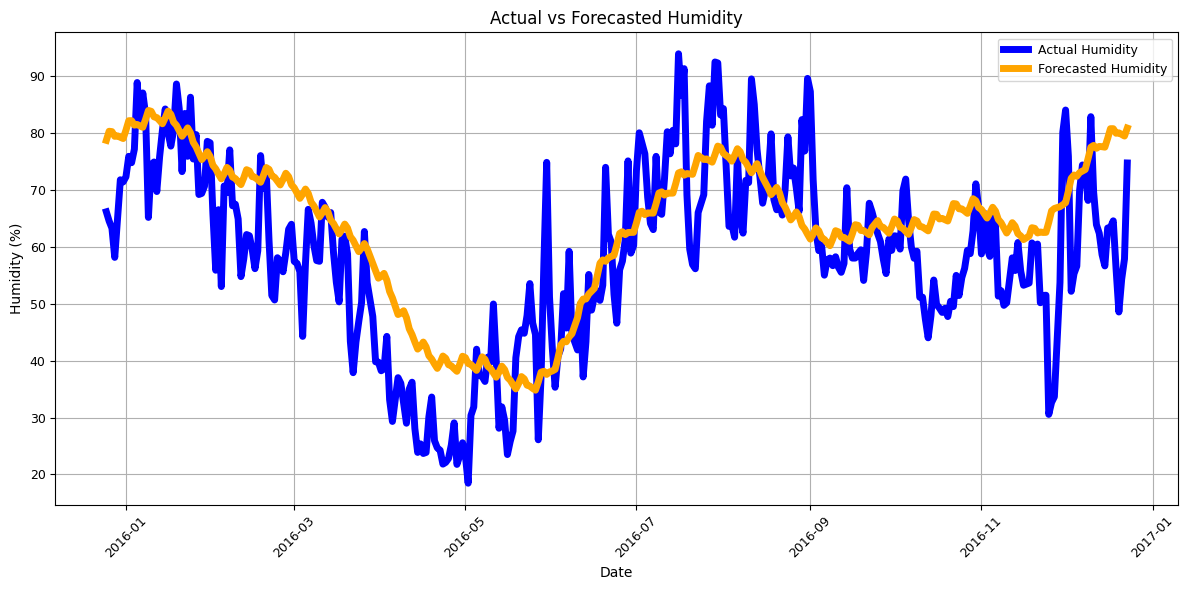

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# --- Prepare DataFrame for Prophet ---
train_reset = train.reset_index()  # convert index to column 'date'
prophet_df = train_reset[['date', 'humidity']].rename(columns={'date': 'ds', 'humidity': 'y'})

# --- Fit Prophet Model ---
model = Prophet()
model.fit(prophet_df)

# --- Create future DataFrame with 365 days ahead ---
future = model.make_future_dataframe(periods=365)

# --- Forecast ---
forecast = model.predict(future)

# --- Select forecast rows corresponding to test period (last 365 days + 1 extra) ---
test_forecast = forecast.iloc[-366:].copy()

# --- Convert 'ds' and test 'date' to datetime ---
test_forecast['ds'] = pd.to_datetime(test_forecast['ds'])
test_reset = test.reset_index()  # reset index to get 'date' column
test_reset['date'] = pd.to_datetime(test_reset['date'])

# --- Rename actual humidity column for clarity ---
real_test = test_reset.rename(columns={'humidity': 'actual_humidity'})

# --- Merge actual test data and forecast on date ---
merged_df = pd.merge(test_forecast[['ds', 'yhat']], real_test[['date', 'actual_humidity']],
                     left_on='ds', right_on='date', how='inner')

# --- Plot Actual vs Forecasted Humidity ---
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['actual_humidity'], label='Actual Humidity', color='blue', linewidth=5)
plt.plot(merged_df['ds'], merged_df['yhat'], label='Forecasted Humidity', color='orange', linewidth=5)

plt.xlabel('Date', fontsize=10)           # smaller font
plt.ylabel('Humidity (%)', fontsize=10)
plt.title('Actual vs Forecasted Humidity', fontsize=12)
plt.legend(fontsize=9)
plt.grid(True)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


**Humedity Evaluation**

Evaluation Metrics for Humidity:
MAE:  9.461
RMSE: 11.589
MAPE: 19.71%


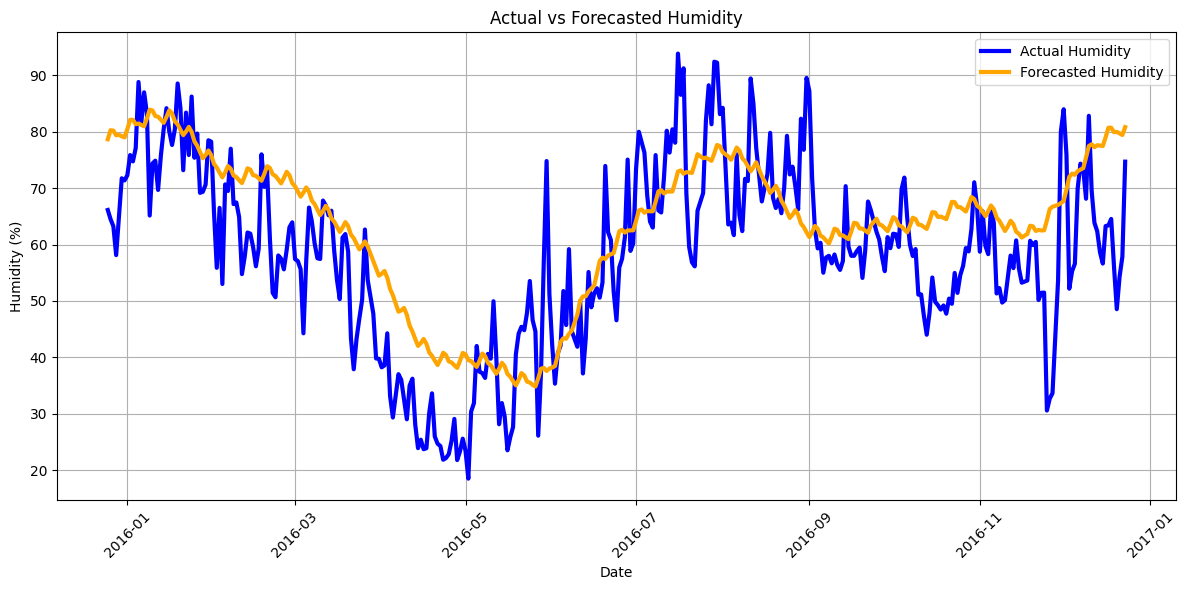

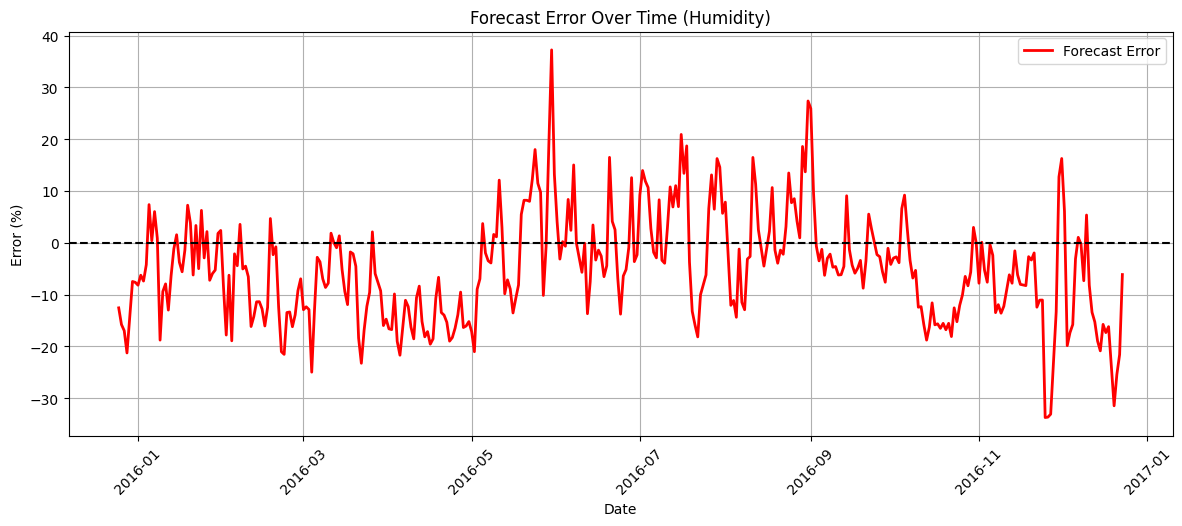

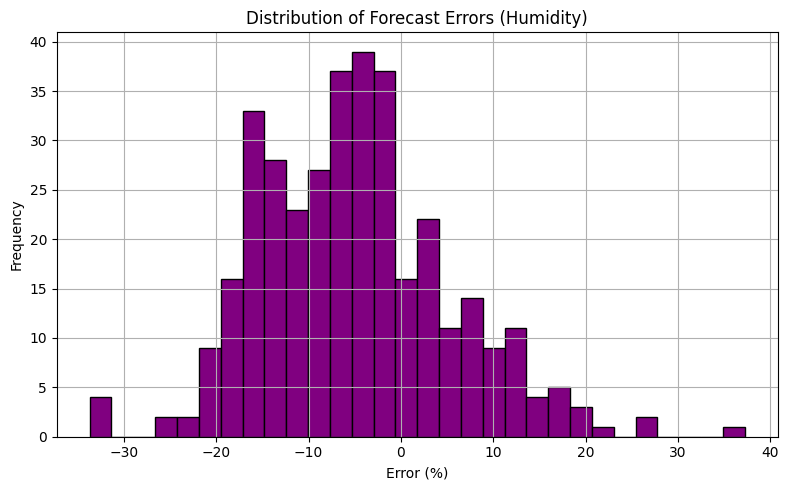

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- Evaluation Metrics ---
y_true = merged_df['actual_humidity']
y_pred = merged_df['yhat']

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Evaluation Metrics for Humidity:")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")

# --- Forecast Error ---
merged_df['error'] = merged_df['actual_humidity'] - merged_df['yhat']

# --- Plot 1: Actual vs Forecasted Humidity ---
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['actual_humidity'], label='Actual Humidity', color='blue', linewidth=3)
plt.plot(merged_df['ds'], merged_df['yhat'], label='Forecasted Humidity', color='orange', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Actual vs Forecasted Humidity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Forecast Error Over Time ---
plt.figure(figsize=(12, 5))
plt.plot(merged_df['ds'], merged_df['error'], label='Forecast Error', color='red', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Forecast Error Over Time (Humidity)')
plt.xlabel('Date')
plt.ylabel('Error (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# --- Plot 3: Histogram of Errors ---
plt.figure(figsize=(8, 5))
plt.hist(merged_df['error'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Forecast Errors (Humidity)')
plt.xlabel('Error (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


**Mean Pressure**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/m_l6_nlr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/3l8nmple.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31098', 'data', 'file=/tmp/tmp7y27vc96/m_l6_nlr.json', 'init=/tmp/tmp7y27vc96/3l8nmple.json', 'output', 'file=/tmp/tmp7y27vc96/prophet_modelzd5zbowq/prophet_model-20250516112540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:25:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:25:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


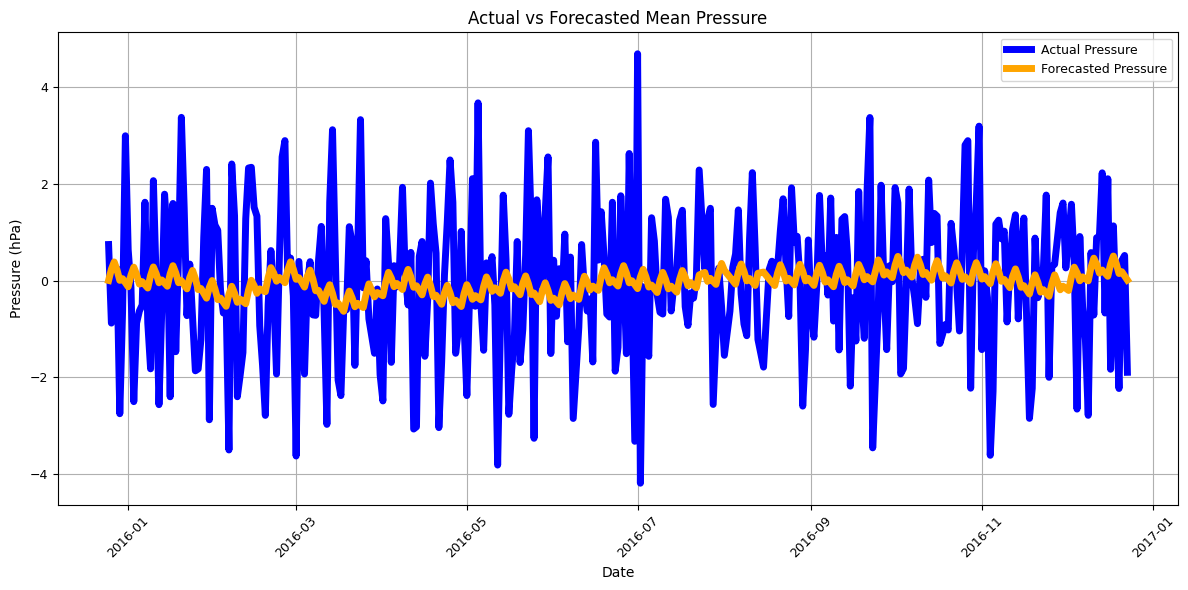

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# --- Prepare DataFrame for Prophet ---
train_reset = train.reset_index()  # convert index to column 'date'
prophet_df = train_reset[['date', 'meanpressure']].rename(columns={'date': 'ds', 'meanpressure': 'y'})

# --- Fit Prophet Model ---
model = Prophet()
model.fit(prophet_df)

# --- Create future DataFrame with 365 days ahead ---
future = model.make_future_dataframe(periods=365)

# --- Forecast ---
forecast = model.predict(future)

# --- Select forecast rows corresponding to test period (last 365 days + 1 extra) ---
test_forecast = forecast.iloc[-366:].copy()

# --- Convert 'ds' and test 'date' to datetime ---
test_forecast['ds'] = pd.to_datetime(test_forecast['ds'])
test_reset = test.reset_index()  # reset index to get 'date' column
test_reset['date'] = pd.to_datetime(test_reset['date'])

# --- Rename actual meanpressure column for clarity ---
real_test = test_reset.rename(columns={'meanpressure': 'actual_pressure'})

# --- Merge actual test data and forecast on date ---
merged_df = pd.merge(test_forecast[['ds', 'yhat']], real_test[['date', 'actual_pressure']],
                     left_on='ds', right_on='date', how='inner')

# --- Plot Actual vs Forecasted Pressure ---
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['actual_pressure'], label='Actual Pressure', color='blue', linewidth=5)
plt.plot(merged_df['ds'], merged_df['yhat'], label='Forecasted Pressure', color='orange', linewidth=5)

plt.xlabel('Date', fontsize=10)           # smaller font
plt.ylabel('Pressure (hPa)', fontsize=10)
plt.title('Actual vs Forecasted Mean Pressure', fontsize=12)
plt.legend(fontsize=9)
plt.grid(True)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/8h1op2x0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/r76qlad4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98654', 'data', 'file=/tmp/tmp7y27vc96/8h1op2x0.json', 'init=/tmp/tmp7y27vc96/r76qlad4.json', 'output', 'file=/tmp/tmp7y27vc96/prophet_model_pknwyng/prophet_model-20250516112613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


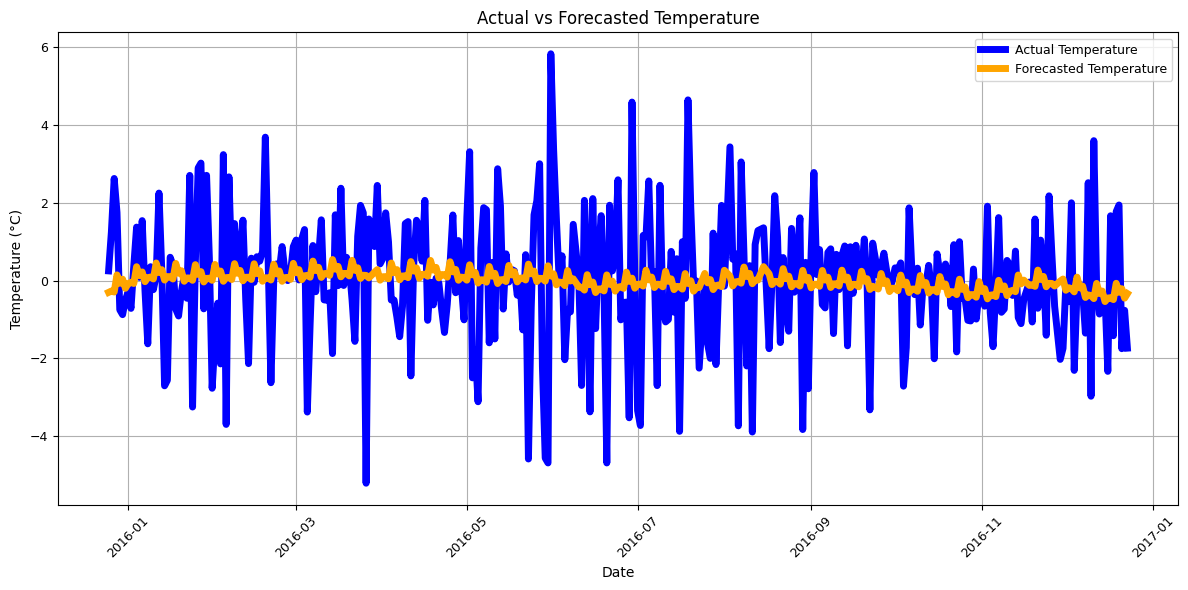

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


train_reset = train.reset_index()
prophet_df = train_reset[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})


model = Prophet()
model.fit(prophet_df)

# --- Create future DataFrame with 365 days ahead ---
future = model.make_future_dataframe(periods=365)

# --- Forecast ---
forecast = model.predict(future)

# --- Select forecast rows corresponding to test period (last 365 days + 1 extra) ---
test_forecast = forecast.iloc[-366:].copy()

# --- Convert 'ds' and test 'date' to datetime ---
test_forecast['ds'] = pd.to_datetime(test_forecast['ds'])
test_reset = test.reset_index()  # reset index to get 'date' column
test_reset['date'] = pd.to_datetime(test_reset['date'])

# --- Rename actual temperature column for clarity ---
real_test = test_reset.rename(columns={'meantemp': 'actual_temp'})

# --- Merge actual test data and forecast on date ---
merged_df = pd.merge(test_forecast[['ds', 'yhat']], real_test[['date', 'actual_temp']],
                     left_on='ds', right_on='date', how='inner')

# --- Plot Actual vs Forecasted Temperature ---
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['actual_temp'], label='Actual Temperature', color='blue', linewidth=5)
plt.plot(merged_df['ds'], merged_df['yhat'], label='Forecasted Temperature', color='orange', linewidth=5)

plt.xlabel('Date', fontsize=10)           # smaller font
plt.ylabel('Temperature (°C)', fontsize=10)
plt.title('Actual vs Forecasted Temperature', fontsize=12)
plt.legend(fontsize=9)
plt.grid(True)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/md3jl90s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/t_54si_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33856', 'data', 'file=/tmp/tmp7y27vc96/md3jl90s.json', 'init=/tmp/tmp7y27vc96/t_54si_2.json', 'output', 'file=/tmp/tmp7y27vc96/prophet_model72hz2_yb/prophet_model-20250516114059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:40:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:40:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Evaluation Metrics:
MAE  (Mean Absolute Error):      1.236
RMSE (Root Mean Squared Error): 2.749
R²   (R-squared score):          -0.013


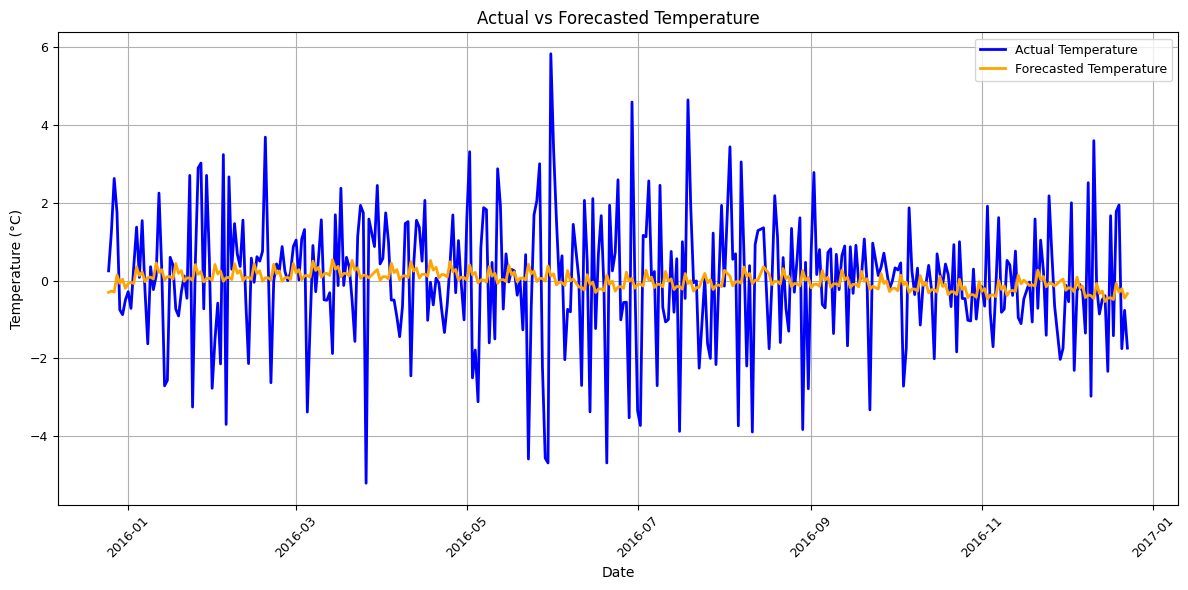

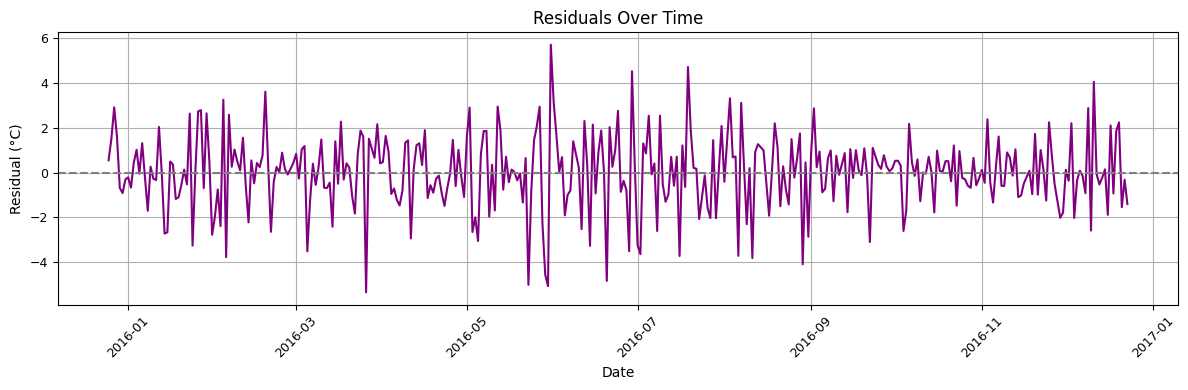

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Prepare training data for Prophet ---
train_reset = train.reset_index()
prophet_df = train_reset[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})

# --- Train Prophet model ---
model = Prophet()
model.fit(prophet_df)

# --- Create future DataFrame with 365 days ahead ---
future = model.make_future_dataframe(periods=365)

# --- Forecast ---
forecast = model.predict(future)

# --- Select forecast rows corresponding to test period (last 365 days + 1 extra) ---
test_forecast = forecast.iloc[-366:].copy()
test_forecast['ds'] = pd.to_datetime(test_forecast['ds'])

# --- Prepare test set ---
test_reset = test.reset_index()
test_reset['date'] = pd.to_datetime(test_reset['date'])
real_test = test_reset.rename(columns={'meantemp': 'actual_temp'})

# --- Merge actual test data and forecast on date ---
merged_df = pd.merge(test_forecast[['ds', 'yhat']], real_test[['date', 'actual_temp']],
                     left_on='ds', right_on='date', how='inner')

# --- Evaluation Metrics ---
mae = mean_absolute_error(merged_df['actual_temp'], merged_df['yhat'])
rmse = mean_squared_error(merged_df['actual_temp'], merged_df['yhat'])
r2 = r2_score(merged_df['actual_temp'], merged_df['yhat'])

print("📈 Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.3f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.3f}")
print(f"R²   (R-squared score):          {r2:.3f}")

# --- Plot Actual vs Forecasted Temperature ---
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['actual_temp'], label='Actual Temperature', color='blue', linewidth=2)
plt.plot(merged_df['ds'], merged_df['yhat'], label='Forecasted Temperature', color='orange', linewidth=2)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.title('Actual vs Forecasted Temperature', fontsize=12)
plt.legend(fontsize=9)
plt.grid(True)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

# --- Plot Residuals (Actual - Forecasted) ---
residuals = merged_df['actual_temp'] - merged_df['yhat']

plt.figure(figsize=(12, 4))
plt.plot(merged_df['ds'], residuals, label='Residuals', color='purple', linewidth=1.5)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Residual (°C)', fontsize=10)
plt.title('Residuals Over Time', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/3wj3vb95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7y27vc96/o09fn14n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75877', 'data', 'file=/tmp/tmp7y27vc96/3wj3vb95.json', 'init=/tmp/tmp7y27vc96/o09fn14n.json', 'output', 'file=/tmp/tmp7y27vc96/prophet_modelmjuol581/prophet_model-20250516113855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:38:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:38:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 Evaluation Metrics:
MAE:  1.236
RMSE: 2.749
R²:   -0.013


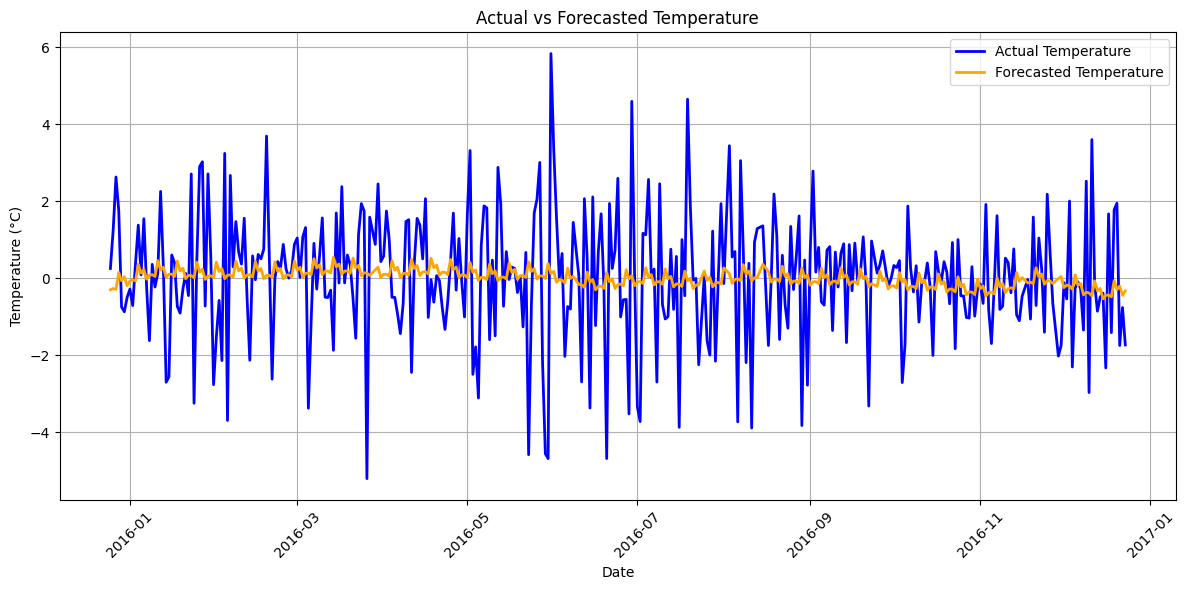

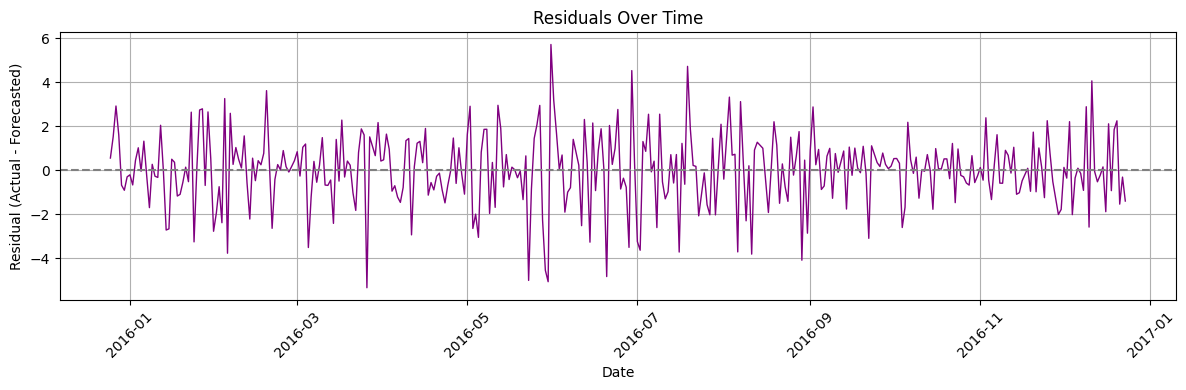

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare training data for Prophet
train_reset = train.reset_index()
prophet_df = train_reset[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})

# Fit model
model = Prophet()
model.fit(prophet_df)

# Forecast 365 days ahead
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Prepare test data
test_forecast = forecast.iloc[-366:].copy()
test_forecast['ds'] = pd.to_datetime(test_forecast['ds'])

test_reset = test.reset_index()
test_reset['date'] = pd.to_datetime(test_reset['date'])
real_test = test_reset.rename(columns={'meantemp': 'actual_temp'})

# Merge for comparison
merged_df = pd.merge(test_forecast[['ds', 'yhat']], real_test[['date', 'actual_temp']],
                     left_on='ds', right_on='date', how='inner')

# Evaluation metrics
mae = mean_absolute_error(merged_df['actual_temp'], merged_df['yhat'])
rmse = mean_squared_error(merged_df['actual_temp'], merged_df['yhat'])
r2 = r2_score(merged_df['actual_temp'], merged_df['yhat'])

print(f"📊 Evaluation Metrics:")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# Plot Actual vs Forecasted
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['actual_temp'], label='Actual Temperature', color='blue', linewidth=2)
plt.plot(merged_df['ds'], merged_df['yhat'], label='Forecasted Temperature', color='orange', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Forecasted Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Residuals plot
residuals = merged_df['actual_temp'] - merged_df['yhat']

plt.figure(figsize=(12, 4))
plt.plot(merged_df['ds'], residuals, color='purple', linewidth=1)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residual (Actual - Forecasted)')
plt.title('Residuals Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
